# Exercises: Decision Tree

<hr style="border:2px solid gray">

In [1]:
#standard DS imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#sklearn imports
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, plot_confusion_matrix

#custom imports
import prepare
import acquire

#filter out any noisy warning flags
import warnings
warnings.filterwarnings('ignore')

## Part I:
Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

1a. What is your baseline prediction? b. What is your baseline accuracy?
- <i>remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.</i>

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

### Acquire

In [2]:
#bring in the data using our function from the acquire lesson
df = acquire.get_titanic_data()

In [3]:
#take a look
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


### Prepare

<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
    <br>
    <br>
The prepare function that we created in the prepare lesson does the following:
     <br>
    -- renames columns
     <br>
    -- drop unneeded and duplicate columns
     <br>
    -- imputes age with mean age
     <br>
    -- creates dummy variables
     <br>
    -- splits data
    </div>

<b>Split Data</b>

In [4]:
#use our function from the prepare lesson to split and clean data
train, validate, test = prepare.prep_titanic_data(df)

In [5]:
#make sure our function worked
train.shape, validate.shape, test.shape

((498, 10), (214, 10), (179, 10))

In [6]:
#take a look at the data
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_Q,embark_S
583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,1,1,29.678105,0,0,110.8833,1,0,0,0


In [7]:
#confirm we have no nulls and correct dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  498 non-null    int64  
 1   pclass    498 non-null    int64  
 2   age       498 non-null    float64
 3   sibsp     498 non-null    int64  
 4   parch     498 non-null    int64  
 5   fare      498 non-null    float64
 6   alone     498 non-null    int64  
 7   sex_male  498 non-null    uint8  
 8   embark_Q  498 non-null    uint8  
 9   embark_S  498 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 32.6 KB


<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
    <br>
    <br>
We will be attempting to make a Decision Tree Classifier Model that will predict survival on the Titanic that performs better than the baseline

### #1a. What is your baseline prediction?

In [8]:
# What is our target? survived
# In order to determine the mode, let's pull a value count
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

<div class="alert alert-block alert-success">
    <b>Takeaways:</b>
        <br>
        <br>
The most common class is '0' or did not survive, so this will be our baseline
        </div>

#### Isolate the target variable

In [9]:
# we know what our X and y are, let's be explicit about defining them
X_train = train.drop(columns='survived')
y_train = train.survived

X_val = validate.drop(columns='survived')
y_val = validate.survived

X_test = test.drop(columns='survived')
y_test = test.survived

### #1b. What is your baseline accuracy?

In [10]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


### #2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
    <br>
    <br>
1. Make the thing
<br>
2. Fit the thing
<br>
3. Use the thing
</div>

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    498 non-null    int64  
 1   age       498 non-null    float64
 2   sibsp     498 non-null    int64  
 3   parch     498 non-null    int64  
 4   fare      498 non-null    float64
 5   alone     498 non-null    int64  
 6   sex_male  498 non-null    uint8  
 7   embark_Q  498 non-null    uint8  
 8   embark_S  498 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 28.7 KB


In [12]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

In [13]:
# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

In [14]:
# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

<div class="alert alert-block alert-info">
     <div class="row vertical-align">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
<b>Instructor Note:</b> 
    <br>
    <br>
    Many students ran into an error when trying to 'plot' their models. (visualize)
    <br>
    When target variable is 0 or 1, you cannot concatinate a string and an integer
    <br>
    You must convert your 'clf.classes_' to a string!
    <br>
    <b>Use</b>: class_names = np.array(clf.classes_).astype('str').tolist()
    </div>

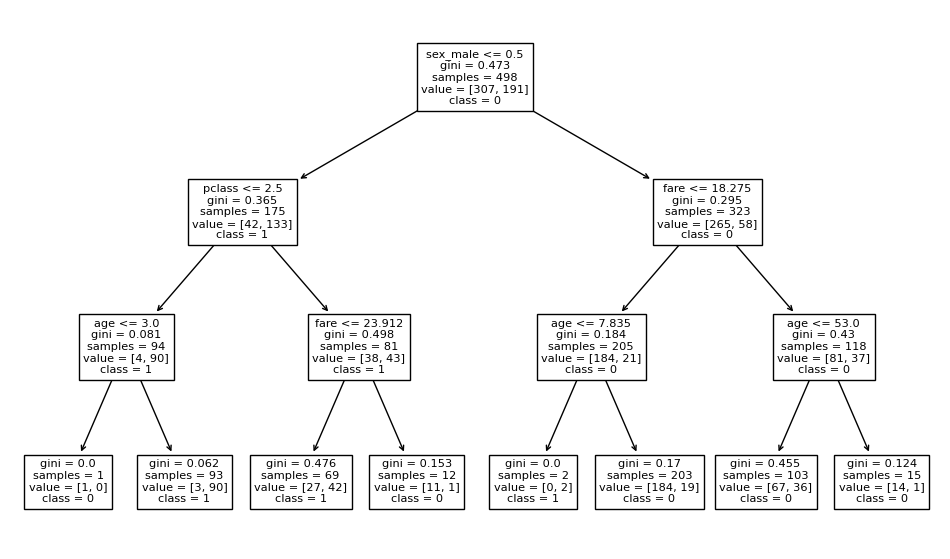

In [15]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

### #3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

<div class="alert alert-block alert-info">
<b>Instructor Note:</b> 
    <br>
    <br>
-- "In-Sample" data: refers to the training set
    <br>
    <br>
-- .score: refers to the accuracy score
</div>

In [16]:
# we have our model clf, let's get those metrics from our informational output
acc = tree1.score(X_train, y_train)
acc

0.8253012048192772

In [17]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


<div class="alert alert-block alert-info">
<b>Instructor Note:</b> 
    <br>
    <br>
plot_confusion_matrix is a utility function for visualizing confusion matrices via matplotlib
    <br>
    -- takes in model, features, target
</div>

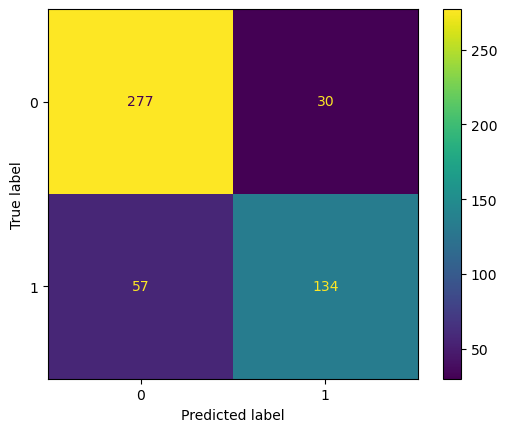

In [18]:
plot_confusion_matrix(tree1, X_train, y_train)

In [19]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



<div class="alert alert-block alert-info">
<b>Instructor Note:</b> 
    <br>
    <br>
    <b>classification_report</b>: builds a text report showing the main classification metrics (precision, recall, accuracy, f1)
    <br>
-- takes in target & model   
    <br>
-- output_dict: returns the output as a dictionary
    <br>
-- In this example, 'y_predictions' is refering to 'tree1' model.
</div>

In [20]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
report

{'0': {'precision': 0.8293413173652695,
  'recall': 0.9022801302931596,
  'f1-score': 0.8642745709828392,
  'support': 307},
 '1': {'precision': 0.8170731707317073,
  'recall': 0.7015706806282722,
  'f1-score': 0.7549295774647887,
  'support': 191},
 'accuracy': 0.8253012048192772,
 'macro avg': {'precision': 0.8232072440484883,
  'recall': 0.8019254054607159,
  'f1-score': 0.8096020742238139,
  'support': 498},
 'weighted avg': {'precision': 0.8246360643391443,
  'recall': 0.8253012048192772,
  'f1-score': 0.8223370333082455,
  'support': 498}}

In [21]:
#to make this report look more readable- let's turn it into a DataFrame
print("Tree of 1 depth")
pd.DataFrame(report).T

Tree of 1 depth


,precision,recall,f1-score,support
0,0.829341,0.902280,0.864275,307.000000
1,0.817073,0.701571,0.754930,191.000000
accuracy,0.825301,0.825301,0.825301,0.825301
macro avg,0.823207,0.801925,0.809602,498.000000
weighted avg,0.824636,0.825301,0.822337,498.000000


### #4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

<div class="alert alert-block alert-info">
<b>Instructor Note:</b> 
    <br>
    <br>
The label of positive and negative is arbitrary. What is sklearn considering to be the positive case here?
</div>

In [22]:
#.ravel returns a contigious array
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP

(277, 30, 57, 134)

In [23]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


<b>Sklearn is calling survival (1) our positive case</b>

In [24]:
# accuracy
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL
# true positive rate, also recall
TPR = recall = TP/ (TP + FN)
# false positive rate
FPR = FP / (FP + TN)
# true negative rate
TNR = TN / (TN + FP)
# false negative rate
FNR = FN / (FN + TP)
# precision
precision = TP / (TP + FP)
# f1
f1_score = 2 * (precision*recall) / (precision+recall)
# support
support_pos = TP + FN
support_neg = FP + TN

### #5. Run through steps 2-4 using a different ```max_depth``` value.

In [25]:
#make the thing
#change your variable names on new models for comparison
tree2 = DecisionTreeClassifier(max_depth=4)

In [26]:
#fit the thing
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

<b>OR we can do something a bit fancier!</b>

In [27]:
# Let's get loopy
for i in range(1, 21):
    # Make the model
    trees = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    trees = trees.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = trees.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     

<div class="alert alert-block alert-success">
    <b>Takeaways:</b>
        <br>
        <br>
Trees with max depth of 15+ appears to have the best accuracy, but does that make them the best model? We'll have to compare it to out-of-sample data to confirm!
        </div>

### #6. Which model performs better on your in-sample data?

- Based on the above loop... model with depth of 15-20 have the highest accuracy

### #7. Which model performs best on your out-of-sample data, the validate set?

<div class="alert alert-block alert-info">
     <div class="row vertical-align">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
<b>Instructor Note:</b> 
    <br>
    <br>
<b>Remember</b>: Do NOT retrain your model on validate or test, just predict!
    </div>

In [28]:
#Use the thing
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_val, y_val)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
2,3,0.825301,0.799065,0.026236
3,4,0.835341,0.794393,0.040949
4,5,0.853414,0.799065,0.054348
5,6,0.865462,0.789720,0.075742
6,7,0.885542,0.780374,0.105168
7,8,0.897590,0.799065,0.098525
8,9,0.921687,0.794393,0.127294
9,10,0.933735,0.794393,0.139342


<div class="alert alert-block alert-success">
    <b>Takeaways:</b>
        <br>
        <br>
As we can see above, models with depth of 14+ have the highest accuracy <b>but</b> how does that compare to the out-of-sample (validate) data?? We have to take the "difference" column into account to determine which model is actually best.
        </div>

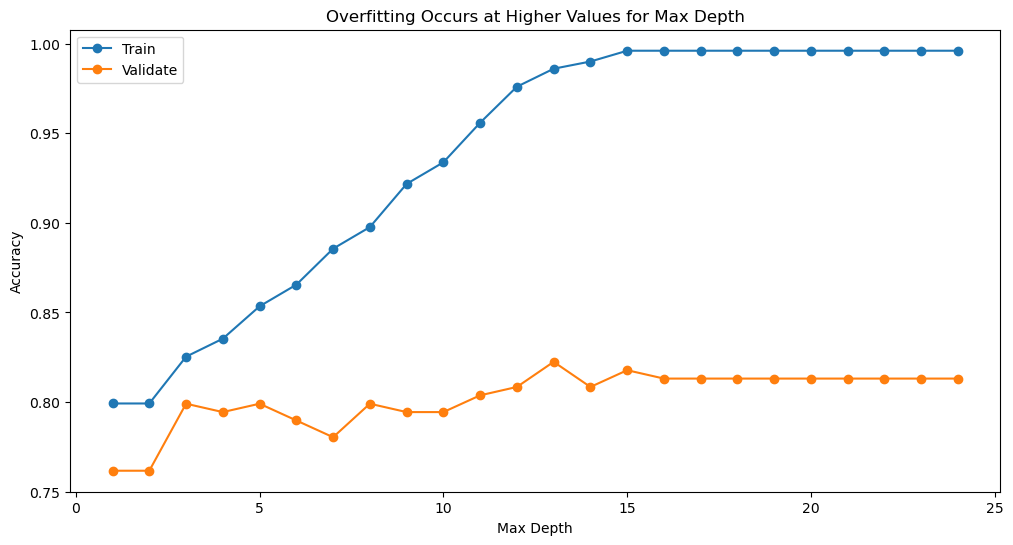

In [29]:
#Let's visualize this
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
    <b>Takeaways:</b>
        <br>
        <br>
For this example, we don't want a difference more than 0.10, <b>so</b> we will sort by less than that difference to determine our "best" model.
        </div>

In [30]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
2,3,0.825301,0.799065,0.026236
4,5,0.853414,0.799065,0.054348
7,8,0.897590,0.799065,0.098525
3,4,0.835341,0.794393,0.040949
5,6,0.865462,0.789720,0.075742
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515


<div class="alert alert-block alert-success">
    <b>Takeaways:</b>
        <br>
        <br>
Max_depth of 3, 5, and 8 had the same out-of-sample (validate) accuracy. Therefore, we can check the difference to determine our best model. Max_depth of 3 had the least difference among the highest scores. We can determine that max_depth of 3 would be best model!
        </div>

<hr style="border:2px solid gray">

# Part II:
1. Work through these same exercises using the Telco dataset.
2. Experiment with this model on other datasets with a higher number of output classes.

In [31]:
#bring in the data using our function from the acquire lesson
telco_df = acquire.get_telco_data()

In [32]:
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [33]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

<div class="alert alert-block alert-success">
    <b>Takeaways:</b>
        <br>
        <br>
It looks like we are going to have a lot of work to do in preparation.
        </div>

<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
    <br>
    <br>
The prepare function that we created in the prepare lesson does the following:
     <br>
    -- turns binary to numeric
     <br>
    -- drops unneccessary columns
     <br>
    -- changes datatypes
     <br>
    -- creates dummy variables
     <br>
    -- drops original columns that created dummies
    <br>
    -- splits data
    </div>

In [34]:
#use the function we created in the prepare lesson
train, validate, test = prepare.prep_telco_data(telco_df)

In [35]:
#take a look at the shape
train.shape, validate.shape, test.shape

((3937, 37), (1688, 37), (1407, 37))

In [36]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,Female,0,No,No,58,Yes,Yes,71.10,4299.20,No,...,0,0,0,1,0,0,0,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,85.45,6028.95,No,...,0,0,0,1,0,1,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,25.75,882.55,No,...,0,1,0,0,0,0,1,0,1,0
2355,Male,0,Yes,Yes,1,Yes,No,19.20,19.20,No,...,0,1,0,0,0,0,1,0,0,1
6279,Male,1,No,No,20,Yes,No,54.00,1055.90,No,...,0,0,0,1,0,0,0,0,0,1


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 3937 non-null   object 
 1   senior_citizen                         3937 non-null   int64  
 2   partner                                3937 non-null   object 
 3   dependents                             3937 non-null   object 
 4   tenure                                 3937 non-null   int64  
 5   phone_service                          3937 non-null   object 
 6   paperless_billing                      3937 non-null   object 
 7   monthly_charges                        3937 non-null   float64
 8   total_charges                          3937 non-null   float64
 9   churn                                  3937 non-null   object 
 10  gender_encoded                         3937 non-null   int64  
 11  p

### Let's work through this
- Step 1: Isolate our target
- Step 2: Create baseline
- Step 3: make, fit, use model

<b>Step 1: Isolate target</b>

<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
    <br>
    <br>
Our target will be 'churn_encoded'
<br>
    <br>
Because we cannot use object datatypes in decision tree classifiers, we will omit them from our X_train, X_val, and X_test as well as our target (churn_encoded)
<br>
    <br>
-- another option would be to remove those columns in preparation, but... we won't have them later if we need them.
<br>
    <br>
-- In this instance, it's preference of the practitioner 
<br>

In [38]:
# we know what our X and y are, let's be explicit about defining them
X_train = train.drop(columns=['churn_encoded', 'gender', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn'])
y_train = train.churn_encoded

X_val = validate.drop(columns=['churn_encoded', 'gender', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn'])
y_val = validate.churn_encoded

X_test = test.drop(columns=['churn_encoded', 'gender', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn'])
y_test = test.churn_encoded

<b>Step 2: Create baseline</b>

<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
    <br>
    <br>
What is our target? 'churn_encoded'
<br>
    <br>
    We are using this instead of 'churn' because churn is an object datatype

In [43]:
# In order to determine the mode, let's pull a value count
train.churn_encoded.value_counts()

0    2891
1    1046
Name: churn_encoded, dtype: int64

<div class="alert alert-block alert-success">
    <b>Takeaways:</b>
        <br>
        <br>
There are far more customers who did not churn ('0') so we will use this as our baseline</div>

In [44]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 73.43%


Another way to accomplish baseline:
```telco_df['baseline'] = 0
baseline_accuracy = (telco_df.baseline == telco_df.churn).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')```

<b>Step 3: Create, Fit, Use your model</b>

In [45]:
#create the model with desired depth
churn_tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

In [46]:
#fit the model
churn_tree1 = churn_tree1.fit(X_train, y_train)

<div class="alert alert-block alert-info">
 <div class="row vertical-align">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
<b>Instructor Note:</b>
    <br>
    <br>
Students ran into issues when it came time to visualize.
<br>
    <br>
<b>Use:</b> plot_tree(clf, feature_names=X_train.columns, 
class_names = np.array(clf.classes_).astype('str').tolist(), rounded=True)
plt.show()
<br>
<br>
<b>Instead of what's shown in curriculum</b>: plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, rounded=True)

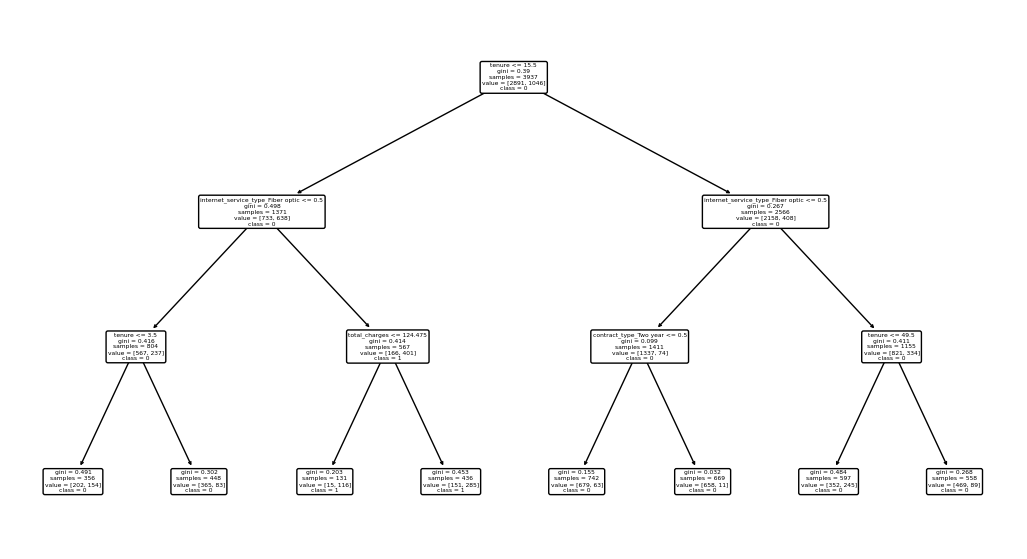

In [50]:
#visualize
plt.figure(figsize=(13, 7))
plot_tree(churn_tree1, feature_names=X_train.columns, 
class_names = np.array(churn_tree1.classes_).astype('str').tolist(), rounded=True)
plt.show()

In [55]:
#Use it
accuracy = churn_tree1.score(X_train, y_train)
print(f'Model 1 accuracy: {accuracy:.2%}')

Model 1 accuracy: 79.40%


<div class="alert alert-block alert-success">
    <b>Takeaways:</b>
        <br>
        <br>
With an accuracy of 79.40%, our Model 1 (max_depth = 3) performed better than our baseline accuracy of 73.43% 
<br>
Let's build a loop to see how different max_depths do!
</div>

In [51]:
#Use the thing
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    churn_trees = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    churn_trees = churn_trees.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = churn_trees.score(X_train, y_train)
    
    out_of_sample_accuracy = churn_trees.score(X_val, y_val)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734315,0.734005,0.000311
1,2,0.794006,0.776066,0.017939
2,3,0.794006,0.776066,0.017939
3,4,0.800610,0.777844,0.022766
4,5,0.806960,0.776066,0.030893
5,6,0.817374,0.779028,0.038345
6,7,0.831852,0.763626,0.068226
7,8,0.842774,0.763626,0.079148
8,9,0.859792,0.760071,0.099721
9,10,0.880112,0.751777,0.128335


<div class="alert alert-block alert-success">
    <b>Takeaways:</b>
        <br>
        <br>
Max_depth of 24 performed best when it comes to train accuracy, but it is far too overfit to consider using.<br>

<br>
Let's visualize this!
</div>

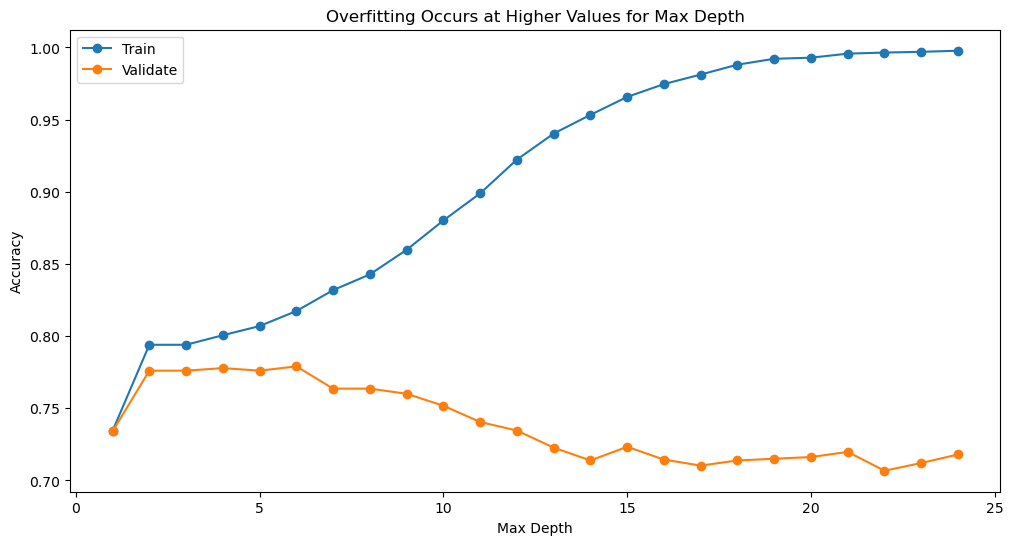

In [52]:
#Let's visualize this
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
    <b>Takeaways:</b>
        <br>
        <br>
It appears that after we get to a max_depth of about 8, our model becomes grossly overfit
</div>

In [57]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
5,6,0.817374,0.779028,0.038345
3,4,0.800610,0.777844,0.022766
1,2,0.794006,0.776066,0.017939
2,3,0.794006,0.776066,0.017939
4,5,0.806960,0.776066,0.030893
6,7,0.831852,0.763626,0.068226
7,8,0.842774,0.763626,0.079148
8,9,0.859792,0.760071,0.099721
0,1,0.734315,0.734005,0.000311


<div class="alert alert-block alert-success">
    <b>Takeaways:</b>
        <br>
        <br>
It looks like max_depth of 6 is our best option
</div>

In [58]:
#create the model with depth of 6
churn_tree2 = DecisionTreeClassifier(max_depth=5, random_state=123)

In [59]:
#fit the model
churn_tree2 = churn_tree2.fit(X_train, y_train)

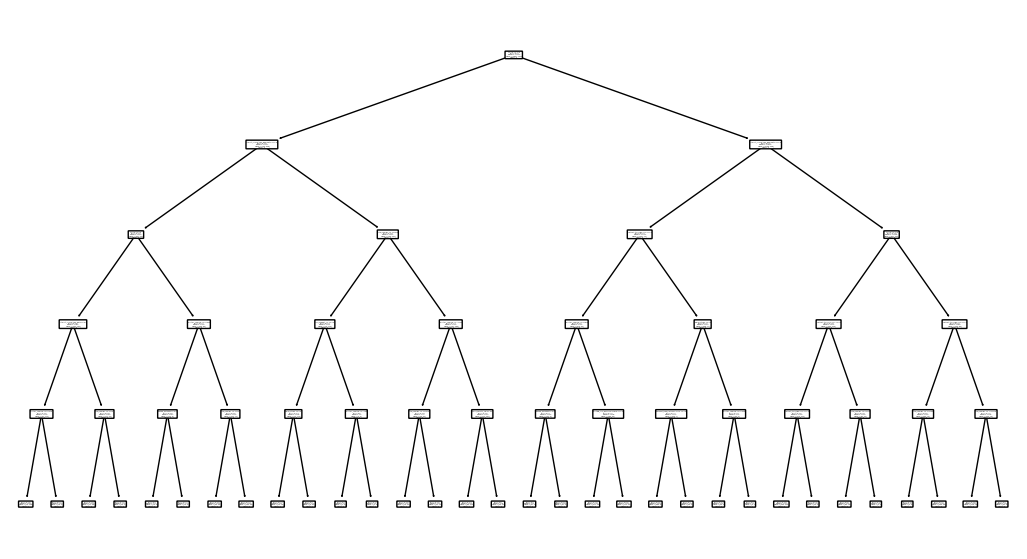

In [60]:
#visualize
plt.figure(figsize=(13, 7))
plot_tree(churn_tree2, feature_names=X_train.columns, 
class_names = np.array(churn_tree2.classes_).astype('str').tolist(), rounded=True)
plt.show()